In [ ]:
a  = 1+1





In [3]:
print(a)

2


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
data =  pd.read_csv('Social_Network_Ads.csv')

In [6]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
x = data[['Age', 'EstimatedSalary']]
y = data['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
classifier = LogisticRegression(random_state=0)

In [ ]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [15]:
y_pred = classifier.predict(x_test)

In [18]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[65  3]
 [ 8 24]]
0.89
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



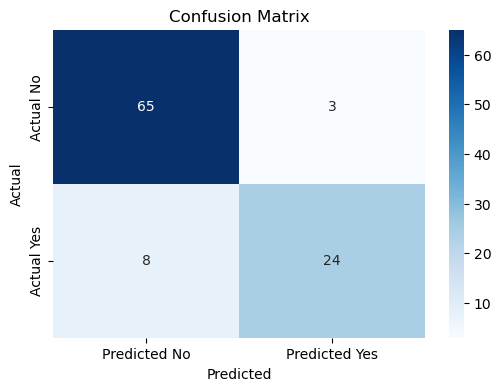

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

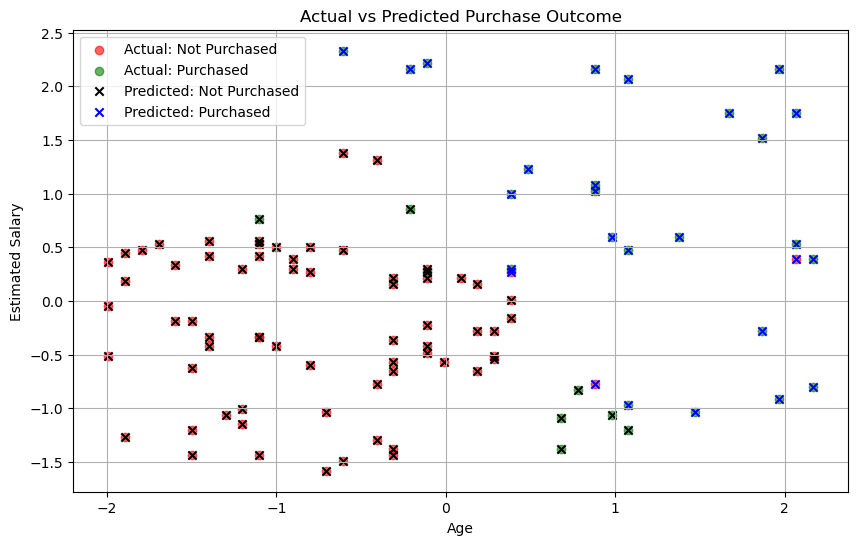

In [21]:
import matplotlib.pyplot as plt

# Inverse transform scaled data for meaningful visualization
X_test_orig = sc.inverse_transform(x_test)  # assuming sc is your StandardScaler

plt.figure(figsize=(10, 6))

# Actual points
plt.scatter(X_test_orig[y_test == 0][:, 0], X_test_orig[y_test == 0][:, 1],
            color='red', label='Actual: Not Purchased', alpha=0.6)
plt.scatter(X_test_orig[y_test == 1][:, 0], X_test_orig[y_test == 1][:, 1],
            color='green', label='Actual: Purchased', alpha=0.6)

# Predicted points as crosses (X)
plt.scatter(X_test_orig[y_pred == 0][:, 0], X_test_orig[y_pred == 0][:, 1],
            marker='x', color='black', label='Predicted: Not Purchased')
plt.scatter(X_test_orig[y_pred == 1][:, 0], X_test_orig[y_pred == 1][:, 1],
            marker='x', color='blue', label='Predicted: Purchased')

plt.title('Actual vs Predicted Purchase Outcome')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.grid(True)
plt.show()